### Get the data


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2023-04-13 08:45:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.251.111.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   188MB/s    in 0.6s    

2023-04-13 08:45:32 (188 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

A very crucial step at the beginning of any machine learning project is becomming one with the data.

And for a computer vision project this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
ls pizza_steak/train

pizza/  steak/


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} and {len(filenames)} images in '{dirpath}'")

There are 2 and 0 images in 'pizza_steak'
There are 2 and 0 images in 'pizza_steak/test'
There are 0 and 250 images in 'pizza_steak/test/steak'
There are 0 and 250 images in 'pizza_steak/test/pizza'
There are 2 and 0 images in 'pizza_steak/train'
There are 0 and 750 images in 'pizza_steak/train/steak'
There are 0 and 750 images in 'pizza_steak/train/pizza'


In [ ]:
# Another way to find out how many images are in a folder.
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first lets get the class names programmatically

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names from the subdirectories.
# In case there is a .DS_Store you can enable the following line:
# class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+"/"+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape: {img.shape}") # Show the shape of the image.
  return img

['3164761.jpg']
image shape: (512, 512, 3)


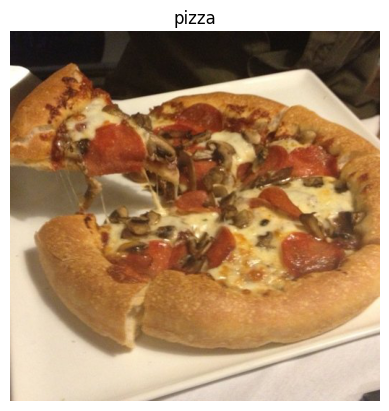

In [ ]:
# view a random image from the training data set
img = view_random_image(target_dir="pizza_steak/train",
                        target_class="pizza")

In [ ]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 14,  12,  17],
        [ 16,  14,  19],
        [ 20,  18,  23],
        ...,
        [ 37,  28,  19],
        [ 40,  31,  22],
        [ 44,  35,  26]],

       [[ 18,  16,  21],
        [ 20,  18,  23],
        [ 21,  19,  24],
        ...,
        [ 36,  27,  18],
        [ 39,  30,  21],
        [ 42,  33,  24]],

       [[ 23,  21,  26],
        [ 24,  22,  27],
        [ 23,  21,  26],
        ...,
        [ 37,  28,  19],
        [ 38,  29,  20],
        [ 40,  31,  22]],

       ...,

       [[140, 119,  98],
        [149, 128, 107],
        [172, 151, 130],
        ...,
        [ 79,  69,  67],
        [ 82,  72,  70],
        [ 86,  76,  75]],

       [[137, 116,  95],
        [147, 126, 105],
        [169, 148, 127],
        ...,
        [ 82,  72,  70],
        [ 82,  72,  70],
        [ 83,  73,  71]],

       [[135, 114,  93],
        [145, 124, 103],
        [167, 146, 125],
        ...,
        [ 83,  74,  6

In [ ]:
# View the image shape
img.shape # Returns, width, hight, channels

(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img / 255.

array([[[0.05490196, 0.04705882, 0.06666667],
        [0.0627451 , 0.05490196, 0.0745098 ],
        [0.07843137, 0.07058824, 0.09019608],
        ...,
        [0.14509804, 0.10980392, 0.0745098 ],
        [0.15686275, 0.12156863, 0.08627451],
        [0.17254902, 0.1372549 , 0.10196078]],

       [[0.07058824, 0.0627451 , 0.08235294],
        [0.07843137, 0.07058824, 0.09019608],
        [0.08235294, 0.0745098 , 0.09411765],
        ...,
        [0.14117647, 0.10588235, 0.07058824],
        [0.15294118, 0.11764706, 0.08235294],
        [0.16470588, 0.12941176, 0.09411765]],

       [[0.09019608, 0.08235294, 0.10196078],
        [0.09411765, 0.08627451, 0.10588235],
        [0.09019608, 0.08235294, 0.10196078],
        ...,
        [0.14509804, 0.10980392, 0.0745098 ],
        [0.14901961, 0.11372549, 0.07843137],
        [0.15686275, 0.12156863, 0.08627451]],

       ...,

       [[0.54901961, 0.46666667, 0.38431373],
        [0.58431373, 0.50196078, 0.41960784],
        [0.6745098 , 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory 

# Set the seed
tf.random.set_seed(42)

# Setup paths to our training data
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Read in our training and test data
train_data = image_dataset_from_directory(directory=train_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)



valid_data = image_dataset_from_directory(directory=test_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)


# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

# Steps per epoch is is len(training_data), len(training_data is equal to number of images devided by the batch size).
# So in our case having 1500 images, this would result in 1500/32 = 46.875 (rounded up to 47). Same is applicable to validation.

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 8s 96ms/step - loss: 0.6627 - accuracy: 0.5887 - val_loss: 0.5451 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 5s 105ms/step - loss: 0.5297 - accuracy: 0.7560 - val_loss: 0.5509 - val_accuracy: 0.7200
Epoch 3/5
47/47 [==============================] - 4s 80ms/step - loss: 0.4705 - accuracy: 0.7780 - val_loss: 0.3728 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 4s 86ms/step - loss: 0.4090 - accuracy: 0.8173 - val_loss: 0.3312 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 4s 82ms/step - loss: 0.3800 - accuracy: 0.8333 - val_loss: 0.3257 - val_accuracy: 0.8660


##Using the same model as before

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory 

# Set the seed
tf.random.set_seed(42)

# Setup paths to our training data
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Read in our training and test data
train_data = image_dataset_from_directory(directory=train_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)


valid_data = image_dataset_from_directory(directory=test_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)

# Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 6s 79ms/step - loss: 1.2430 - accuracy: 0.5780 - val_loss: 0.6825 - val_accuracy: 0.5540
Epoch 2/5
47/47 [==============================] - 4s 79ms/step - loss: 0.6529 - accuracy: 0.6740 - val_loss: 0.6197 - val_accuracy: 0.7320
Epoch 3/5
47/47 [==============================] - 4s 69ms/step - loss: 0.6122 - accuracy: 0.7447 - val_loss: 0.6175 - val_accuracy: 0.7320
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.5955 - accuracy: 0.7620 - val_loss: 0.5853 - val_accuracy: 0.7400
Epoch 5/5
47/47 [==============================] - 4s 69ms/step - loss: 0.5859 - accuracy: 0.7633 - val_loss: 0.5742 - val_accuracy: 0.7420


In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 4)                 602116    
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set the seed
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(24, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 81ms/step - loss: 7.8420 - accuracy: 0.5613 - val_loss: 2.6817 - val_accuracy: 0.5160
Epoch 2/5
47/47 [==============================] - 4s 86ms/step - loss: 0.9772 - accuracy: 0.6787 - val_loss: 0.5739 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 5s 97ms/step - loss: 0.5385 - accuracy: 0.7653 - val_loss: 0.4986 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 4s 69ms/step - loss: 0.5217 - accuracy: 0.7567 - val_loss: 0.4823 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 4s 76ms/step - loss: 0.5795 - accuracy: 0.7407 - val_loss: 0.4909 - val_accuracy: 0.7820


In [ ]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 32)                4816928   
                                                                 
 dense_8 (Dense)             (None, 24)                792       
                                                                 
 dense_9 (Dense)             (None, 16)                400       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,818,137
Trainable params: 4,818,137
No

## Binary classification: Let's break it down.

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling / normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiement, ...)

### 1. Become One with the data

['3142045.jpg']
image shape: (512, 512, 3)
['2785084.jpg']
image shape: (366, 512, 3)


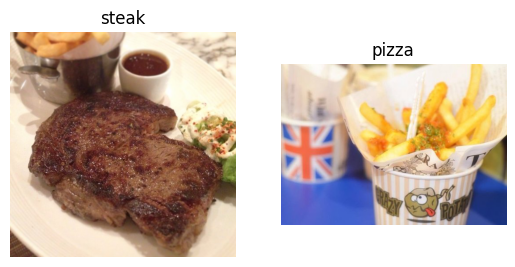

In [ ]:
import matplotlib.pyplot as plt
import os

# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
streak_img = view_random_image("pizza_steak/train", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is turn our data in batches.

In [ ]:
# Create train and test data generators.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
# Load in our image data from direcxtories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, # Target directory
                                               target_size=(224, 224), # Image size (Height, Width)
                                               class_mode = "binary", # Type of data you're working with
                                               batch_size=32) # Size of minibatches to load into

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size=(224, 224),
                                             class_mode = "binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # Get the "next" batch of images/labels;
len(images), len(labels)

(32, 32)

In [ ]:
# How man baches are there
len(train_data)

47

In [ ]:
# Get the first two images
# images[:2], images[0].shape

In [ ]:
# View the first batch of labels
labels

array([0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

Note: In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing the best in the field for your problem)

In [ ]:
# Make the creating of our model a little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a three layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filters is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=(3, 3), # size of the sliding window going across an input
           strides=(1, 1), # the size of the step the sliding window will take across an input
           padding="valid", # if "same" output shape is same as input shape, if "valid" output shape gets compressed.
           activation="relu",
           input_shape=(224, 224, 3)), # input later (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only one neuron)
])



In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
           epochs=5, 
           steps_per_epoch=len(train_data),
           validation_data=test_data,
           validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 287ms/step - loss: 0.7943 - accuracy: 0.6847 - val_loss: 0.5587 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4896 - accuracy: 0.7793 - val_loss: 0.4495 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4280 - accuracy: 0.8193 - val_loss: 0.4099 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.3346 - accuracy: 0.8760 - val_loss: 0.4359 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.2160 - accuracy: 0.9280 - val_loss: 0.4947 - val_accuracy: 0.7740


## 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

def plot_history(history):
  # rcParams['figure.figsize'] = (16, 6)
  plt.figure(figsize=(10,6))
  rcParams['axes.spines.top'] = False
  rcParams['axes.spines.right'] = False 

  # Plot the traiing loss and accuracy
  plt.plot(history.history['loss'], label='Training loss', color='#0000FF', linewidth=1.5)
  if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation loss', color='#00FF00', linewidth=1.5)

  # Plot the learning rate
  if 'lr' in history.history:
    plt.plot(history.history['lr'], label='Learning rate', color='#000000', linewidth=1.5, linestyle='--')
  plt.title('Loss', size=20)
  plt.xticks(history.epoch)
  plt.xlabel('Epoch', size=14)
  plt.legend()

  # Start a new figure
  plt.figure(figsize=(10,6))

  # Plot the validation loss and accuracy
  plt.plot(history.history['accuracy'], label='Training accuracy', color='#0000FF', linewidth=1.5)
  if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation accuracy', color='#00FF00', linewidth=1.5)

  # Plot the learning rate
  if 'lr' in history.history:
    plt.plot(history.history['lr'], label='Learning rate', color='#000000', linewidth=1.5, linestyle='--')

  plt.title('Accuracy', size=20)
  plt.xticks(history.epoch)
  plt.xlabel('Epoch', size=14)
  plt.legend()

  plt.show()    


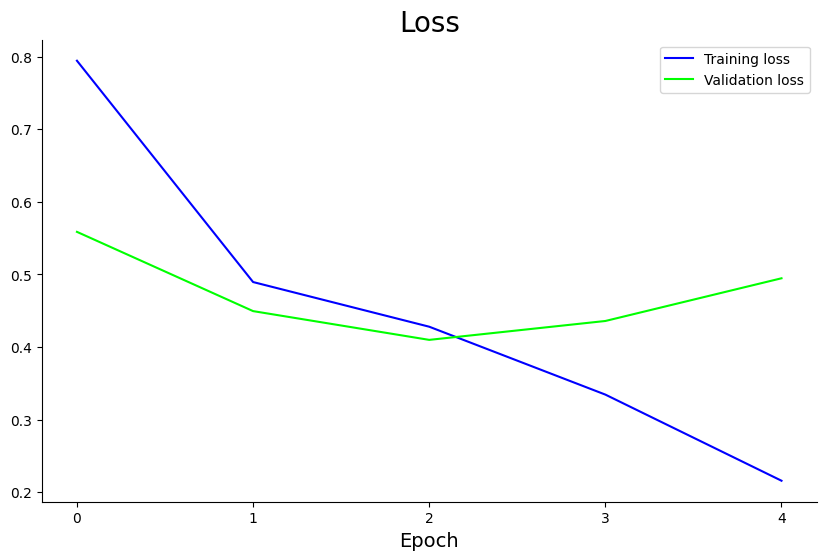

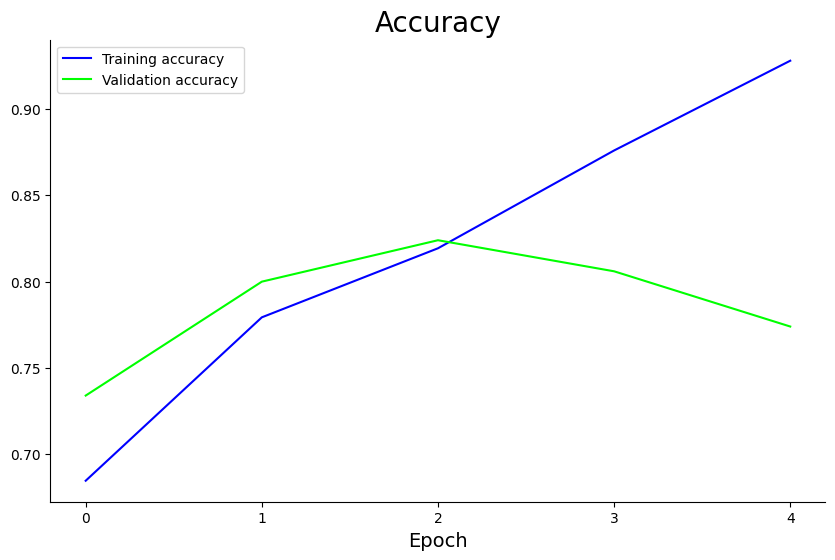

In [ ]:
plot_history(history_4)

In [ ]:
history_4.history

{'loss': [0.8339341878890991,
  0.4850671887397766,
  0.3174840211868286,
  0.16386356949806213,
  0.0662163645029068],
 'accuracy': [0.5366666913032532,
  0.7733333110809326,
  0.8733333349227905,
  0.9586666822433472,
  0.9866666793823242],
 'val_loss': [0.676667332649231,
  0.4456254839897156,
  0.3895094096660614,
  0.3894672989845276,
  0.46611952781677246],
 'val_accuracy': [0.527999997138977,
  0.8299999833106995,
  0.8220000267028809,
  0.8339999914169312,
  0.8119999766349792]}

### 6. Adjust the model parameters

Fitting a machine learnign model comes in three steps:

0. Create a baseline (simple model)
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

Wats to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer.

Ways to reduce overfitting:

* Add data augemntation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.losses import binary_crossentropy

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
from keras.losses import binary_crossentropy

# Comnpile the model
model_5.compile(loss=binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(
    train_data, 
    epochs=5, 
    steps_per_epoch=len(train_data), 
    validation_data=test_data, 
    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 263ms/step - loss: 0.6520 - accuracy: 0.6260 - val_loss: 0.5346 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 12s 256ms/step - loss: 0.5171 - accuracy: 0.7480 - val_loss: 0.3974 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 12s 256ms/step - loss: 0.4747 - accuracy: 0.7807 - val_loss: 0.3516 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 12s 257ms/step - loss: 0.4239 - accuracy: 0.8107 - val_loss: 0.3877 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 12s 252ms/step - loss: 0.4089 - accuracy: 0.8200 - val_loss: 0.3483 - val_accuracy: 0.8660


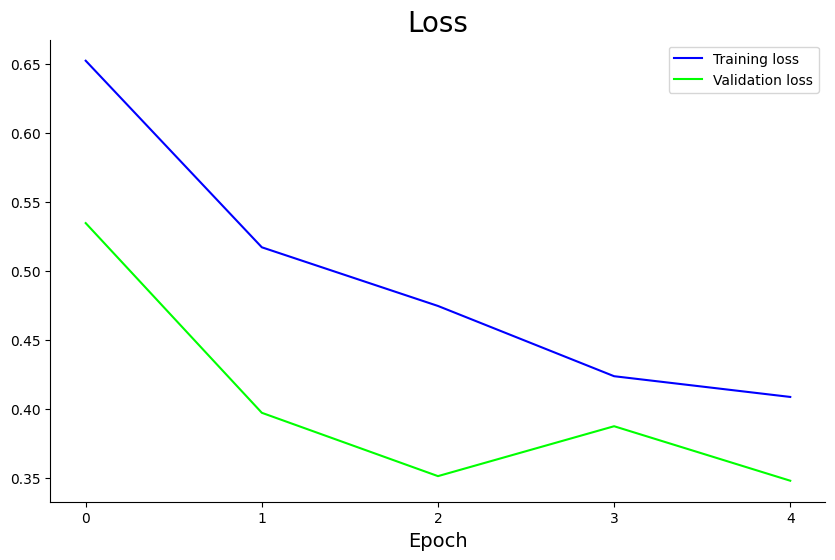

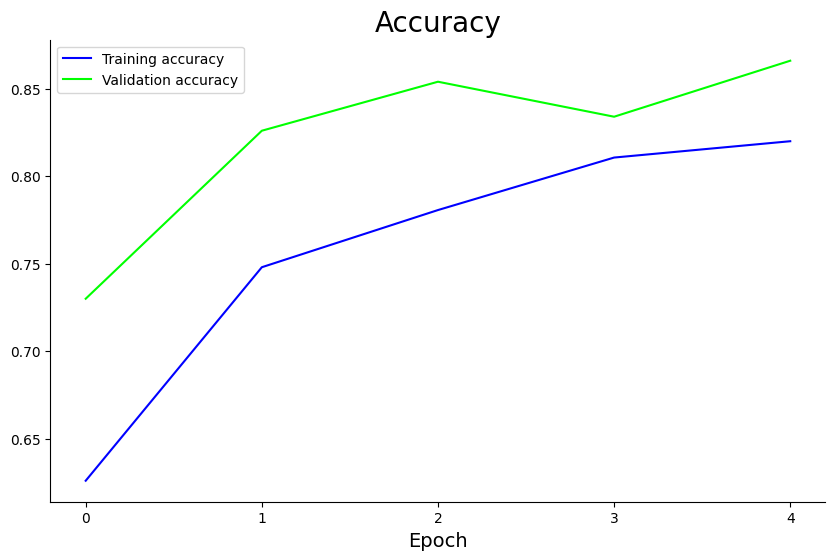

In [ ]:
plot_history(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augementation.

train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,     # how much do you want to rotate the image?
    shear_range=0.2,        # how much do you want to shear an image?
    zoom_range=0.2,         # zoom in randomly on an image
    width_shift_range=0.2,  # move your image around on the x-axis
    height_shift_range=0.2, # move your image around on the y-axis
    horizontal_flip=True)   # do you want to flip the image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augementation for test dataset.
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augemntation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hioefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True) # For demonstration purpose no shuffleing.

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmentes test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)


Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmentes test data:
Found 500 images belonging to 2 classes.


In [ ]:
test_data

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels are not augmented, only images.



In [ ]:
import random
import matplotlib.pyplot as plt

def view_random_image_from(images, labels, batch_size=32, random_number=-1):
  """
    images: images loaded using a ImageDataGenerator.
    labels: labels loaded using a ImageDataGenerator.
    batch_size: as configured when loading images using the ImageDataGenerator
    random_number: -1 for random otherwise specify index.
  """
  if random_number == -1:
    random_number = random.randint(0, batch_size)

  plt.imshow(images[random_number])
  plt.title(f"idx: {random_number}, label: {labels[random_number]}")
  plt.axis(False)
  plt.figure()


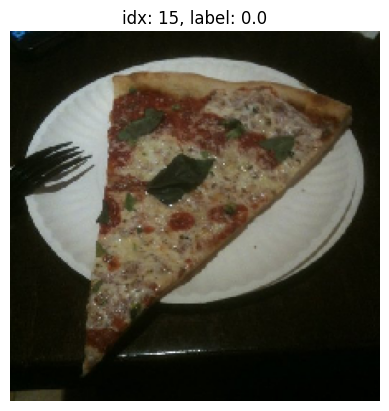

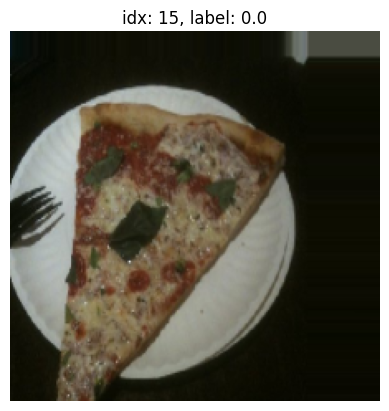

<Figure size 640x480 with 0 Axes>

In [ ]:
import random

random_number = random.randint(0, 32)
view_random_image_from(images, labels, random_number=random_number)
view_random_image_from(augmented_images, labels, random_number=random_number)


Now we've seen waht augmented training data looks like, let's build a model and see how it learns.

In [ ]:
# build the model
model_6 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# compile the model
model_6.compile(loss=binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
history_6 = model_6.fit(train_data_augmented, 
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 564ms/step - loss: 0.7050 - accuracy: 0.4080 - val_loss: 0.6911 - val_accuracy: 0.5940
Epoch 2/5
47/47 [==============================] - 23s 488ms/step - loss: 0.7300 - accuracy: 0.5387 - val_loss: 0.6845 - val_accuracy: 0.5060
Epoch 3/5
47/47 [==============================] - 25s 525ms/step - loss: 0.6979 - accuracy: 0.5427 - val_loss: 0.6905 - val_accuracy: 0.5040
Epoch 4/5
47/47 [==============================] - 27s 583ms/step - loss: 0.7071 - accuracy: 0.6027 - val_loss: 0.6885 - val_accuracy: 0.6280
Epoch 5/5
47/47 [==============================] - 25s 541ms/step - loss: 0.6872 - accuracy: 0.6160 - val_loss: 0.6735 - val_accuracy: 0.7580


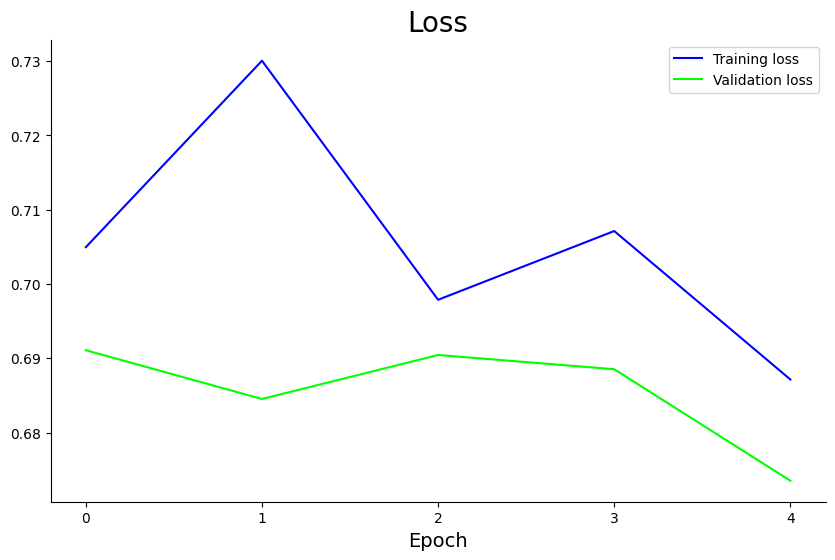

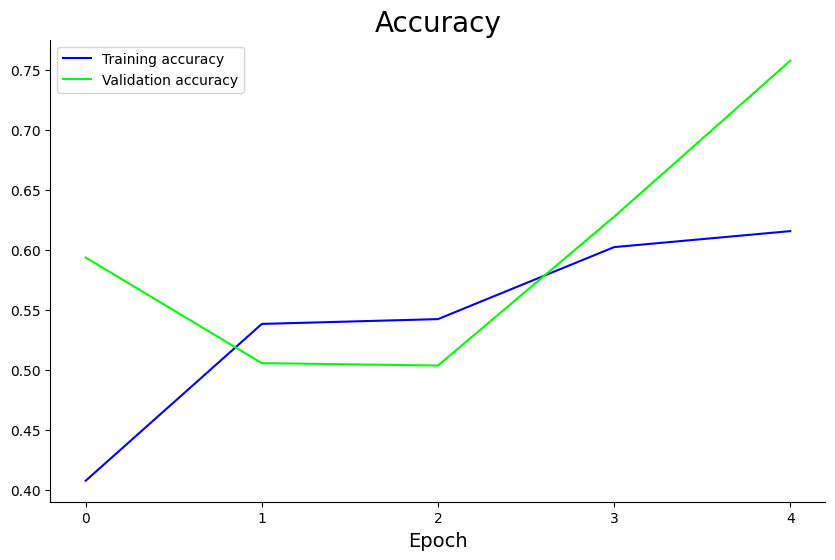

In [ ]:
plot_history(history_6)

In [ ]:
train_data_augmented_shuffled = train_datagen.flow_from_directory(train_dir,
                                                         target_size=(224, 224),
                                                         class_mode="binary",
                                                         batch_size=32,
                                                         shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model
model_7 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss=binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled, 
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 208ms/step - loss: 0.6102 - accuracy: 0.6713 - val_loss: 0.5460 - val_accuracy: 0.6780
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4892 - accuracy: 0.7667 - val_loss: 0.4011 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4466 - accuracy: 0.8073 - val_loss: 0.4055 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.4347 - accuracy: 0.8120 - val_loss: 0.3761 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3916 - accuracy: 0.8347 - val_loss: 0.3930 - val_accuracy: 0.8200


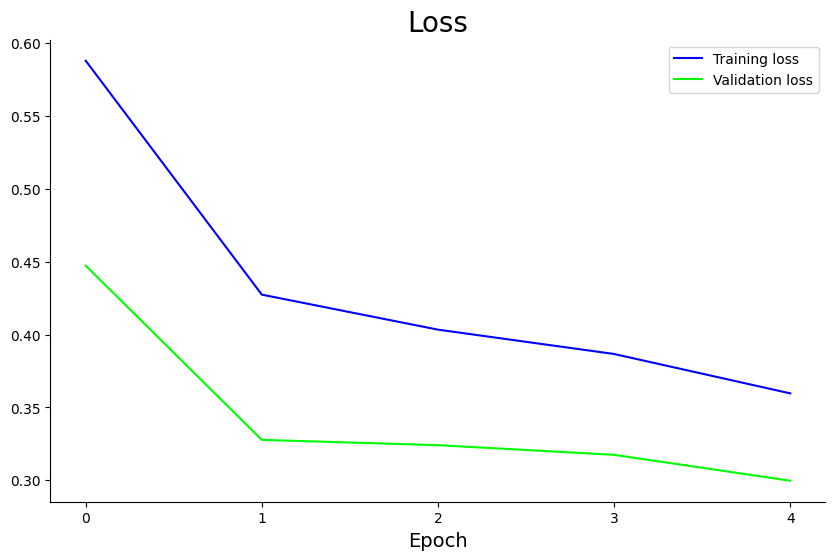

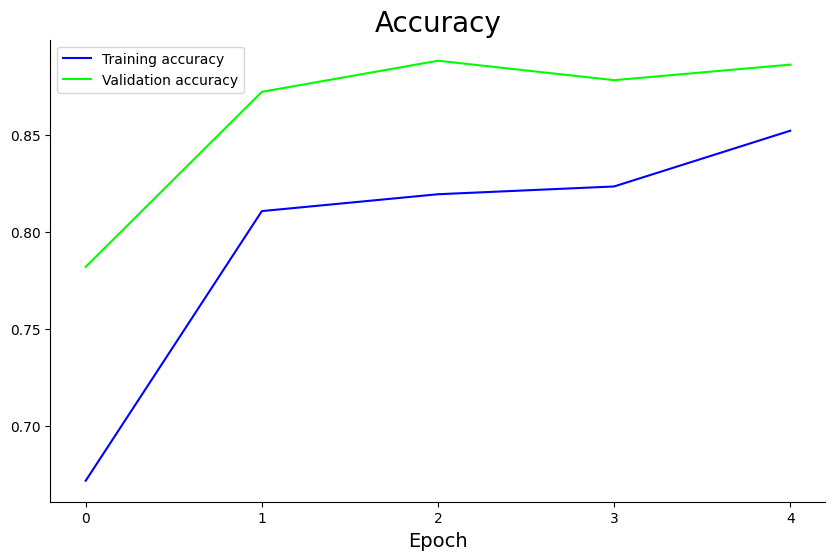

In [ ]:
plot_history(history_7)

from tensorflow.python.ops.ragged import ragged_tensor
### 7. Repeat until satisfied

Since we've already beaten our baseline there are a few things we could try to continue to improve our model

* Increase the number of model layers (more Conv2D / MaxPool2D)
* Increase the number of filters in each layer (10, 32, 64)
* Train for longer (more Epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler


model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

lr_scheduler = LearningRateScheduler(lambda epoch: 0.001 * 10 ** (epoch/13))


model_8.compile(loss=binary_crossentropy,
                optimizer=Adam(learning_rate=0.001),
                metrics=["accuracy"])


In [ ]:
history_8 = model_8.fit(train_data_augmented_shuffled, 
            epochs=15, 
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(test_data), callbacks=[])

Epoch 1/15
47/47 [==============================] - 62s 1s/step - loss: 0.6595 - accuracy: 0.6167 - val_loss: 0.5526 - val_accuracy: 0.7320
Epoch 2/15
47/47 [==============================] - 63s 1s/step - loss: 0.5771 - accuracy: 0.7127 - val_loss: 0.5096 - val_accuracy: 0.7640
Epoch 3/15
47/47 [==============================] - 60s 1s/step - loss: 0.4993 - accuracy: 0.7700 - val_loss: 0.4117 - val_accuracy: 0.8240
Epoch 4/15
47/47 [==============================] - 63s 1s/step - loss: 0.4351 - accuracy: 0.8053 - val_loss: 0.3894 - val_accuracy: 0.8520
Epoch 5/15
47/47 [==============================] - 64s 1s/step - loss: 0.4186 - accuracy: 0.8033 - val_loss: 0.3313 - val_accuracy: 0.8740
Epoch 6/15
47/47 [==============================] - 60s 1s/step - loss: 0.3984 - accuracy: 0.8273 - val_loss: 0.3445 - val_accuracy: 0.8600
Epoch 7/15
47/47 [==============================] - 63s 1s/step - loss: 0.3930 - accuracy: 0.8353 - val_loss: 0.3210 - val_accuracy: 0.8740
Epoch 8/15
47/47 [==

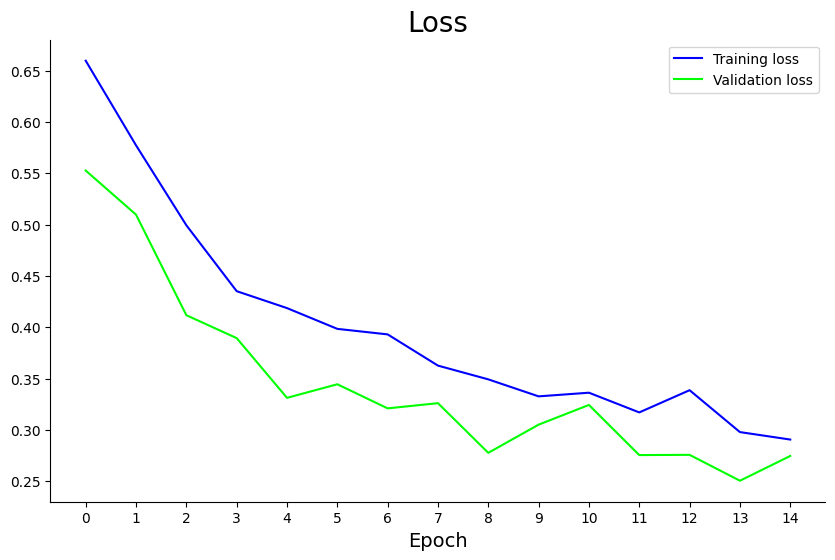

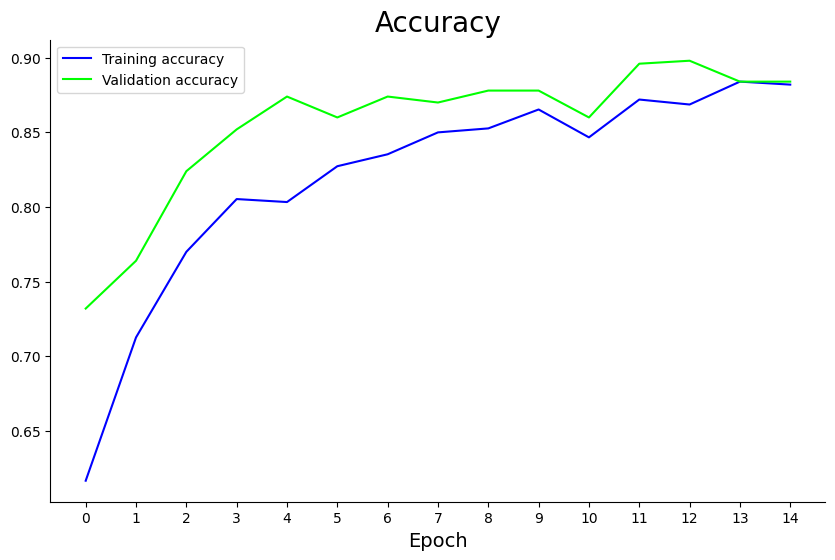

In [ ]:
plot_history(history_8)

In [ ]:
# Note: The confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix.
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """
    y_true    =      The actual result
    y_pred    =      The predicted result
    classes   =      The classes in case of a multi-class validation
    figsize   =      Size of the graph
    text_size =      Font-size
    Plots the decision boundary created by a model predicting on X.
    Inspired by the following two websites:
    https://cs231n.github.io/neural-networks-case-study
  """

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]
  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  # label the axes
  ax.set(title="Confusion matrix",
        xlabel="predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  # Adjust label size
  ax.yaxis.label.set_size(text_size);
  ax.xaxis.label.set_size(text_size);
  ax.title.set_size(text_size);
  # Set treshold for different colors
  threshold = (cm.max() + cm.min()) / 2.
  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]}, ({cm_norm[i, j]*100:.1f}%)",
      horizontalalignment="center",
      color="white" if cm[i, j] > threshold else "black",
      size=text_size)

(224, 224, 3)

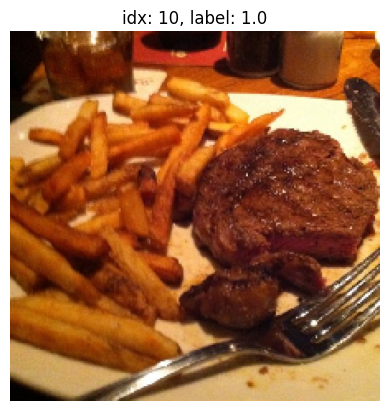

<Figure size 640x480 with 0 Axes>

In [ ]:
import tensorflow as tf

images, labels = test_data.next()

view_random_image_from(images, labels, batch_size=32)
images[11].shape

16/16 [==============================] - 8s 465ms/step


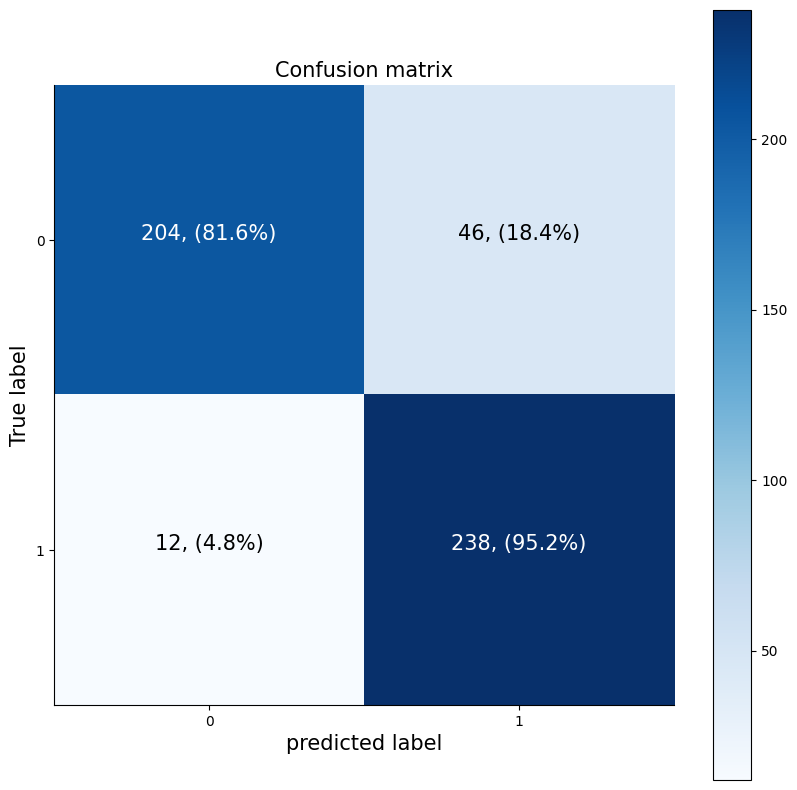

In [ ]:
import tensorflow as tf

Y_pred = model_8.predict(test_data, batch_size=32)
make_confusion_matrix(y_true=test_data.classes, y_pred=tf.round(Y_pred))


16/16 [==============================] - 4s 250ms/step


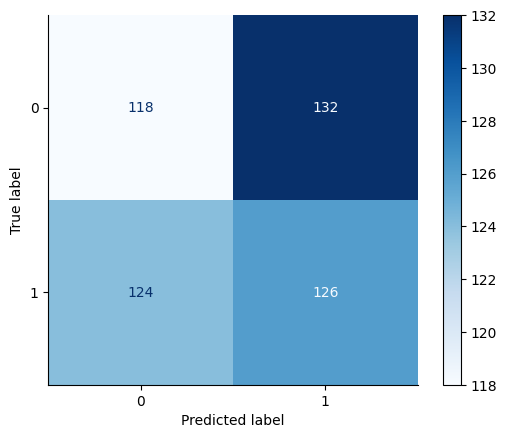

In [ ]:
import tensorflow as tf
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

Y_pred = model_8.predict(test_data, batch_size=32)


cm = confusion_matrix(test_data.classes, tf.round(Y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

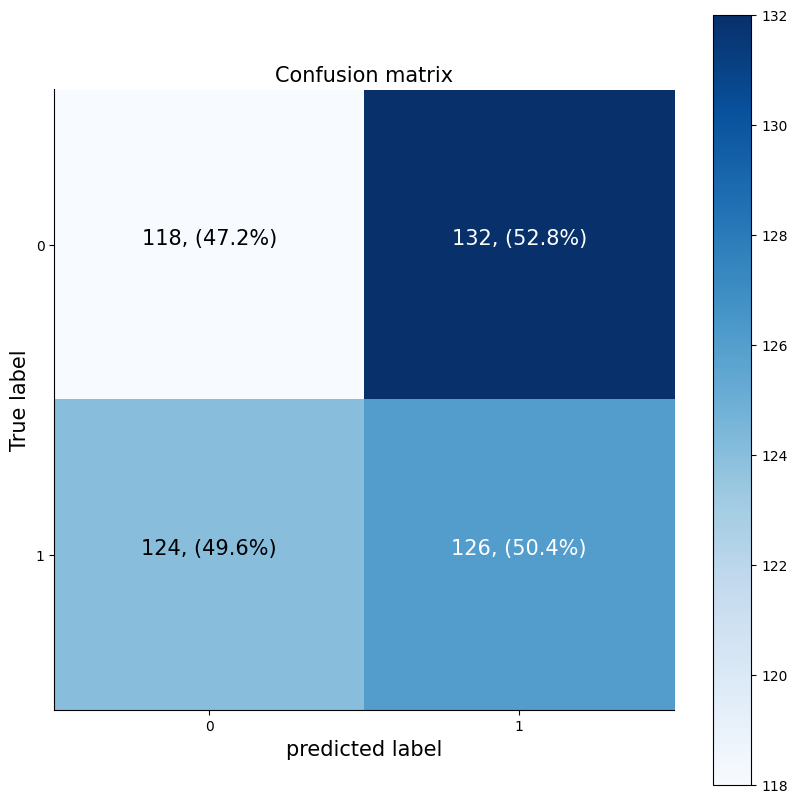

In [ ]:
make_confusion_matrix(y_true=test_data.classes, y_pred=tf.round(Y_pred))


In [ ]:
test_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
test_data2 = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=True)

Found 500 images belonging to 2 classes.


In [ ]:
test_data2


In [ ]:
test_data2.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Making a prediction with our trained model on our own custom data

--2023-04-13 09:45:34--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1         [ <=>                ] 143.28K  --.-KB/s    in 0.01s   

2023-04-13 09:45:35 (12.2 MB/s) - ‘03-steak.jpeg.1’ saved [146718]



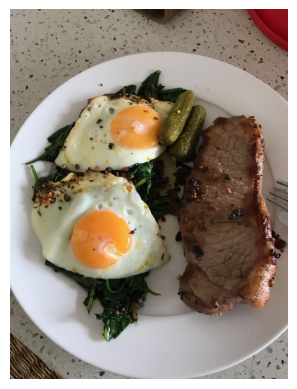

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# check the shape of our image
steak.shape

(4032, 3024, 3)

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [ ]:
model_8.predict(expanded_steak)

ValueError: ignored

In [ ]:
import tensorflow as tf

def tf_load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to 
  (img_shape, img_shape, channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = tf_load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
y_pred = model_8.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 51ms/step


Looks like our custom image is being put through our model however, it currently outputs a prediction probability, wouldn';t it be nice if we could visualize the image as well as get the model's prediction?

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and index it on the class names
class_names[int(tf.round(y_pred))]

'steak'

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def tf_pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots
  the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = tf_load_and_prep_image(filename)

  # Make a prediction (and add the batch to the shape)
  y_pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  y_pred_class = class_names[int(tf.round(y_pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {y_pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 64ms/step


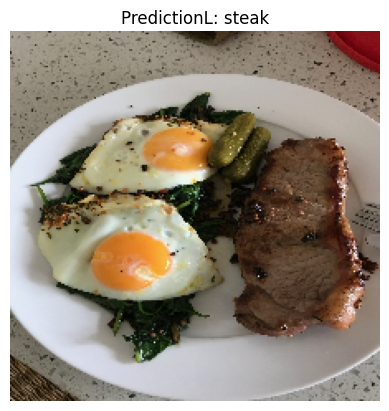

In [ ]:
tf_pred_and_plot(model_8, "03-steak.jpeg", class_names=class_names)

# Multi-class Image Classification 

We've just been through a bunch of the following steps with our binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification)

1. Become one with the data
2. Preprocess the data
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and impprove the model ( try to beat baseline / reduce overfitting)
7. Repeat until satisfied



## 1. Import and become one with the dat

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import itertools
import random
import os
import pathlib
import zipfile

from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.models import clone_model

from matplotlib import rcParams

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Download and extract the zip file.
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2023-04-14 12:59:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  22.2MB/s    in 22s     

2023-04-14 12:59:33 (22.0 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
!ls 10_food_classes_all_data

test  train


In [ ]:
!ls 10_food_classes_all_data/train

chicken_curry  fried_rice      hamburger  pizza  steak
chicken_wings  grilled_salmon  ice_cream  ramen  sushi


In [ ]:
import os
# Walk through 10_classes of food data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} and {len(filenames)} images in '{dirpath}'")

There are 2 and 0 images in '10_food_classes_all_data'
There are 10 and 0 images in '10_food_classes_all_data/train'
There are 0 and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 and 750 images in '10_food_classes_all_data/train/steak'
There are 0 and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 and 750 images in '10_food_classes_all_data/train/sushi'
There are 10 and 0 images in '10_food_classes_all_data/test'
There are 0 and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 0 and 250 im

In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image_from_dir(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+"/"+target_class
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"image shape: {img.shape}") # Show the shape of the image.
  return img

In [ ]:
# Setup train and test directories

train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [ ]:
# Get class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

['2521951.jpg']
image shape: (512, 289, 3)


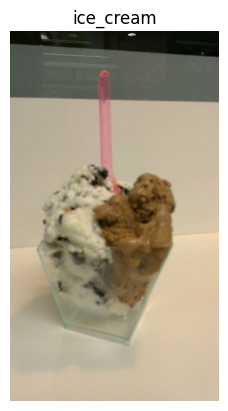

In [ ]:
import random

target_class = random.choice(class_names)
img = view_random_image_from_dir(target_dir=train_dir, target_class=target_class)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               batch_size=32)

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               batch_size=32)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create the baseline model

In [ ]:
model_9 = Sequential([
    Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [ ]:
# Compile the model
model_9.compile(loss=categorical_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data, 
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 55s 217ms/step - loss: 2.1120 - accuracy: 0.2345 - val_loss: 1.9747 - val_accuracy: 0.2972
Epoch 2/5
235/235 [==============================] - 50s 213ms/step - loss: 1.7560 - accuracy: 0.4007 - val_loss: 1.8119 - val_accuracy: 0.3688
Epoch 3/5
235/235 [==============================] - 50s 211ms/step - loss: 1.2191 - accuracy: 0.5893 - val_loss: 2.1172 - val_accuracy: 0.3232
Epoch 4/5
235/235 [==============================] - 50s 211ms/step - loss: 0.5597 - accuracy: 0.8219 - val_loss: 2.9789 - val_accuracy: 0.2776
Epoch 5/5
235/235 [==============================] - 51s 215ms/step - loss: 0.1918 - accuracy: 0.9452 - val_loss: 4.3132 - val_accuracy: 0.2784


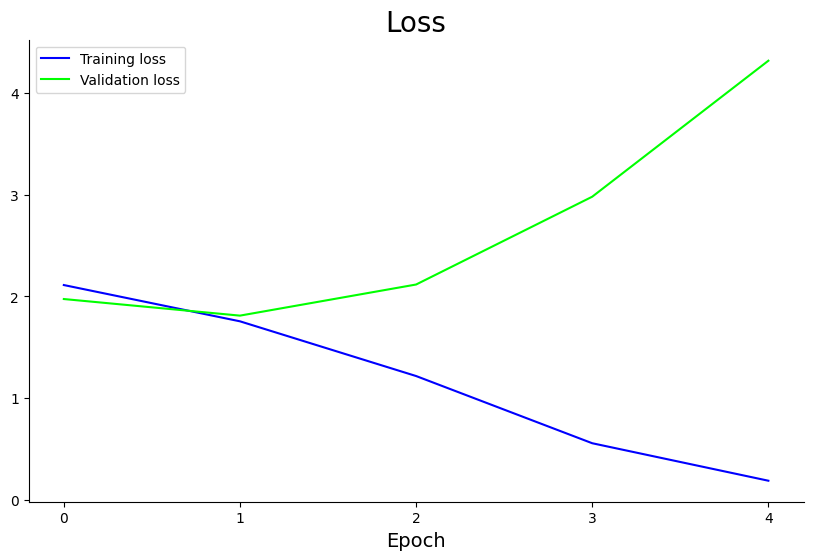

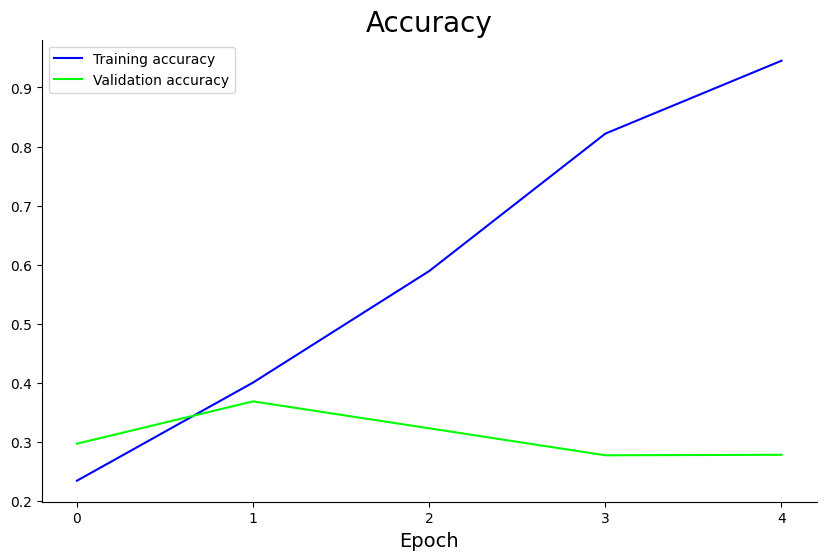

In [ ]:
plot_history(history_9)

In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 13s 162ms/step - loss: 4.3132 - accuracy: 0.2784


[4.3131794929504395, 0.2784000039100647]

### 6. Adjust the model hyperparameters (to beat the baseline / reduce overfitting)

Due to its performance on the training data, it;s clear our model is learning something...

However, it's not generalizing well to unsee data (overfitting):

* Get more data - having more data gives a model more opportunity to learn diverse patterns...
* Simplify the model - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to reduce # of layers or reduce # hidden units in layers
* Use data augmentation - data augmentation monipulates the training data in huch a way to add more diversity to it (without altering the original data)
* Use transfer learning - transfer learning leverages the patters another model ahs learned on similar data to your own and allow you to use those patters on your own dataset.

In [ ]:
# How about we try and simplify the model first
# Let's try to remove 2 convolutional layers...

model_10 = Sequential([
    Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3), activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
# Compile the model

model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
# Fit the model

history_10 = model_10.fit(train_data, 
             epochs=5,
             steps_per_epoch=len(train_data),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 72s 259ms/step - loss: 2.1207 - accuracy: 0.2293 - val_loss: 1.9485 - val_accuracy: 0.3004
Epoch 2/5
235/235 [==============================] - 50s 214ms/step - loss: 1.8545 - accuracy: 0.3579 - val_loss: 1.8812 - val_accuracy: 0.3432
Epoch 3/5
235/235 [==============================] - 51s 219ms/step - loss: 1.5578 - accuracy: 0.4856 - val_loss: 1.8608 - val_accuracy: 0.3720
Epoch 4/5
235/235 [==============================] - 51s 218ms/step - loss: 1.1210 - accuracy: 0.6425 - val_loss: 2.0085 - val_accuracy: 0.3360
Epoch 5/5
235/235 [==============================] - 50s 212ms/step - loss: 0.6771 - accuracy: 0.8060 - val_loss: 2.3839 - val_accuracy: 0.3316


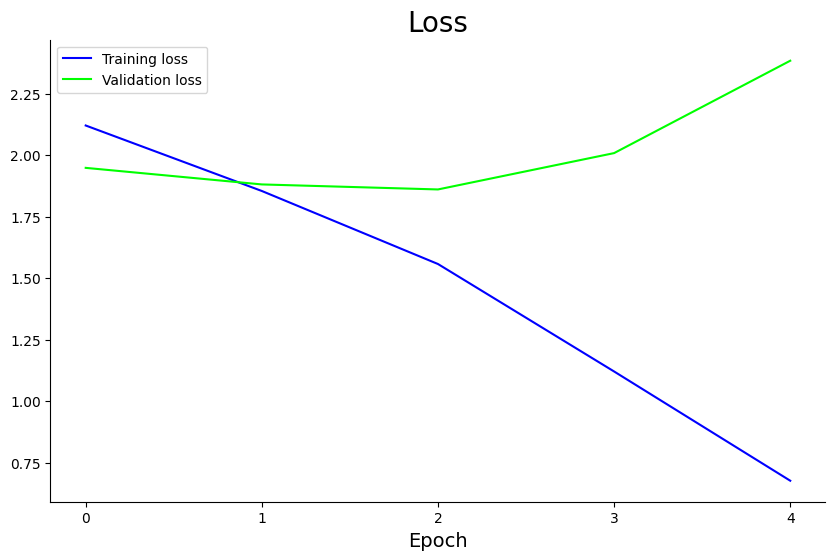

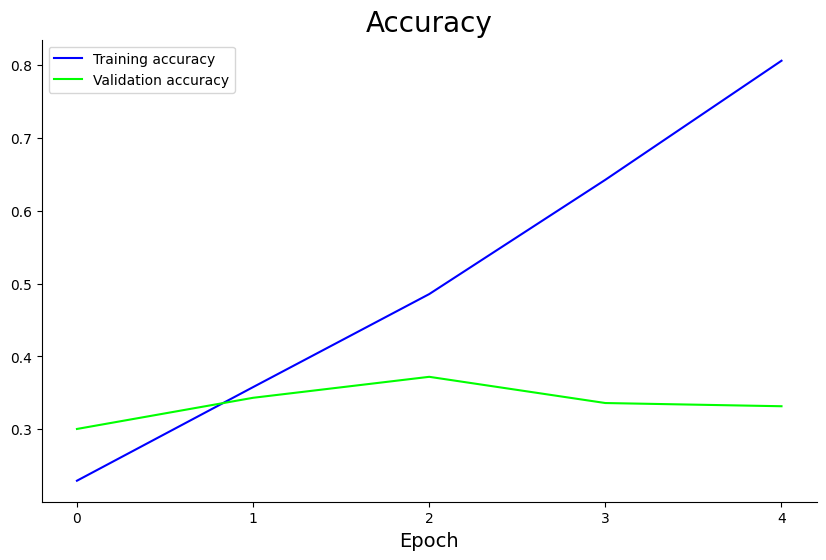

In [ ]:
plot_history(history_10)

Looks like our "simplifying the model" experiment didn't work, how about we try data augmentation. 

In [ ]:
# Create an augmented data generator instance
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=.2,
                                   width_shift_range=.2,
                                   height_shift_range=.2,
                                   zoom_range=.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224, 224), class_mode="categorical", batch_size=32)

test_data = train_datagen.flow_from_directory(directory=test_dir, target_size=(224, 224), class_mode="categorical", batch_size=32, shuffle=False)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Build a new model
model_11 = clone_model(model_9)

In [ ]:
# Compile the model
model_11.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
# Fit the model

history_11 = model_11.fit(train_data,
             epochs=5,
             steps_per_epoch=len(train_data),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 161s 671ms/step - loss: 2.2600 - accuracy: 0.1433 - val_loss: 2.1961 - val_accuracy: 0.1916
Epoch 2/5
235/235 [==============================] - 152s 647ms/step - loss: 2.1324 - accuracy: 0.2357 - val_loss: 2.0504 - val_accuracy: 0.2688
Epoch 3/5
235/235 [==============================] - 150s 637ms/step - loss: 2.0519 - accuracy: 0.2655 - val_loss: 1.9960 - val_accuracy: 0.2908
Epoch 4/5
235/235 [==============================] - 149s 636ms/step - loss: 2.0019 - accuracy: 0.2947 - val_loss: 1.9507 - val_accuracy: 0.3336
Epoch 5/5
235/235 [==============================] - 147s 625ms/step - loss: 1.9589 - accuracy: 0.3156 - val_loss: 1.8930 - val_accuracy: 0.3392


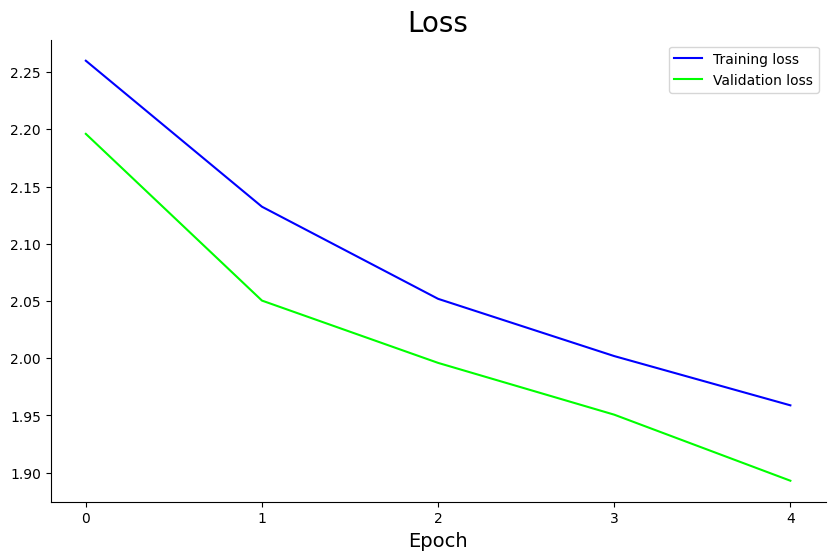

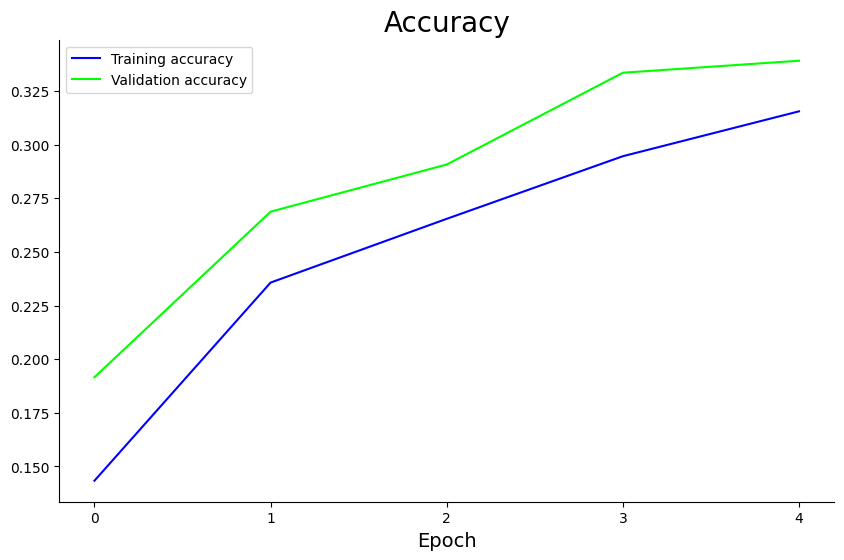

In [ ]:
plot_history(history_11)

### 7. Repeat until satisfied

We could keep going here... continuesly trying to bring our loss curves closer together and trying to improve the lavidation/test accuracy.

How?

By running lots of experiments, namely:
- Restructuring our model's architecture (increasing layers / hidden units)
- Adjust the learning rate
- TRy different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- Train for longer (e.g. 10 epochs instead of 5)

In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """
    y_true    =      The actual result
    y_pred    =      The predicted result
    classes   =      The classes in case of a multi-class validation
    figsize   =      Size of the graph
    text_size =      Font-size
    Plots the decision boundary created by a model predicting on X.
    Inspired by the following two websites:
    https://cs231n.github.io/neural-networks-case-study
  """

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]
  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  # label the axes
  ax.set(title="Confusion matrix",
        xlabel="predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  # Adjust label size
  ax.yaxis.label.set_size(text_size);
  ax.xaxis.label.set_size(text_size);
  ax.title.set_size(text_size);
  # Set treshold for different colors
  threshold = (cm.max() + cm.min()) / 2.
  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]}, ({cm_norm[i, j]*100:.1f}%)",
      horizontalalignment="center",
      color="white" if cm[i, j] > threshold else "black",
      size=text_size)

In [ ]:
Y_pred = model_11.predict(test_data, batch_size=32)


79/79 [==============================] - 41s 516ms/step


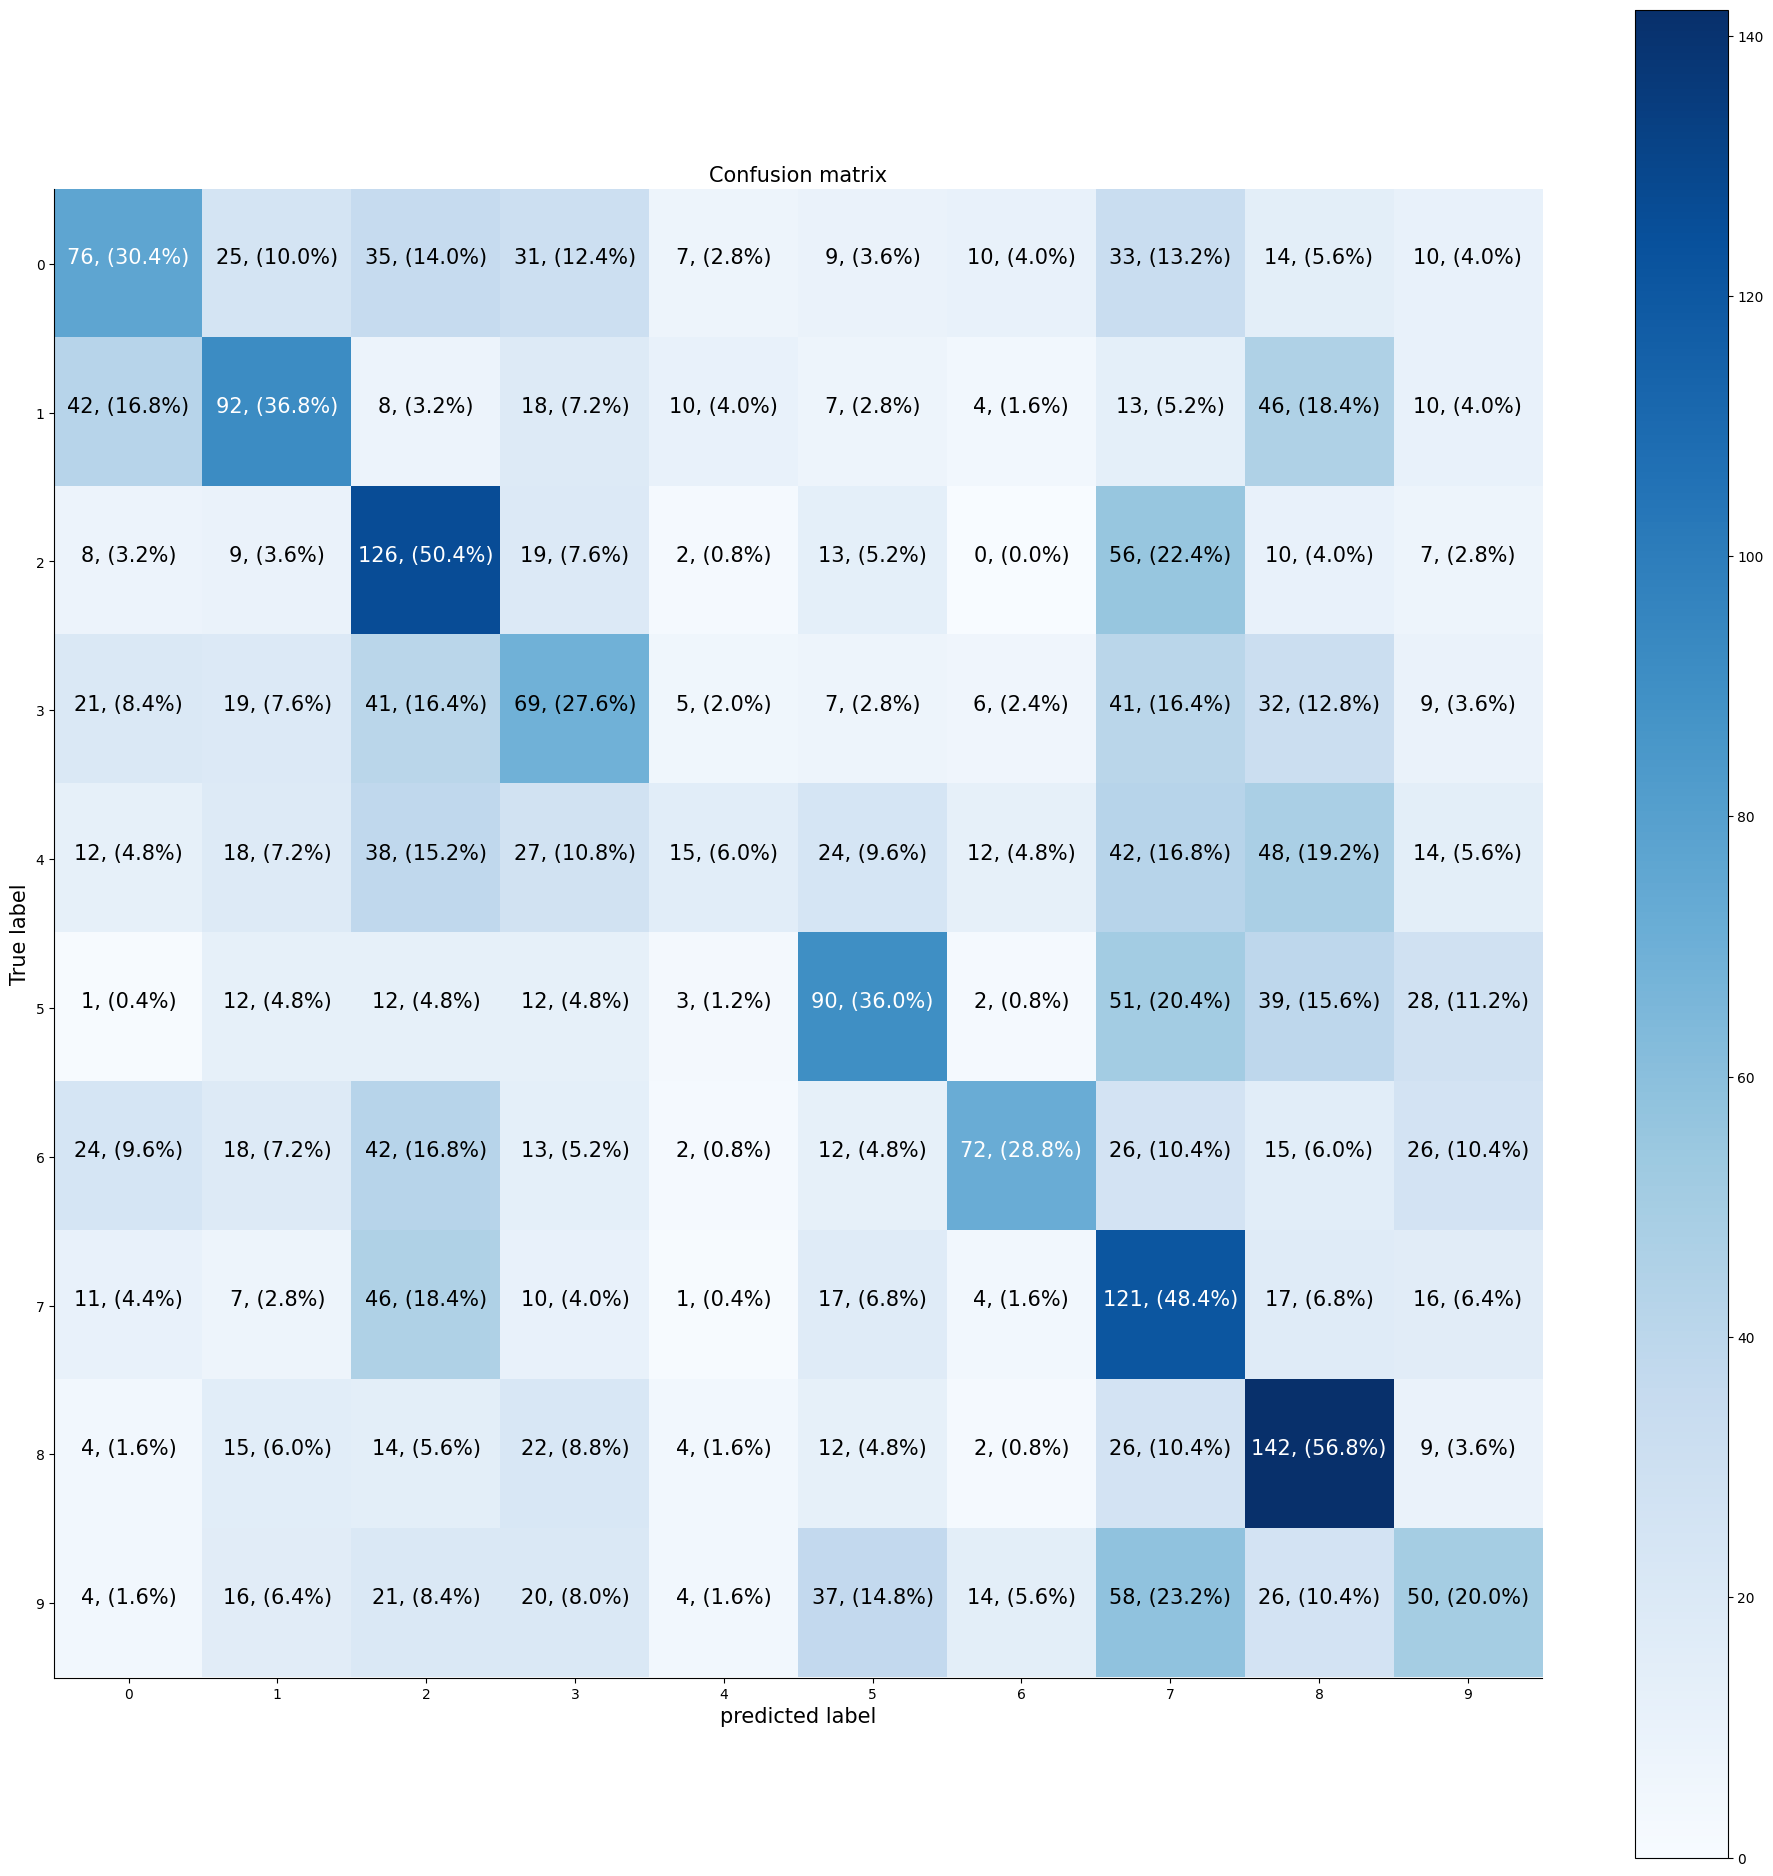

In [ ]:
make_confusion_matrix(y_true=test_data.classes, y_pred=tf.argmax(Y_pred, axis=1), figsize=(24,24))

In [ ]:
# import numpy as np
# rounded_labels=np.argmax(test_labels, axis=1)
test_data.classes[40:]

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [ ]:
tf.argmax(Y_pred, axis=1)

<tf.Tensor: shape=(2500,), dtype=int64, numpy=array([3, 0, 6, ..., 7, 5, 7])>

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
Y_pred

array([[0.07547958, 0.12214095, 0.07043734, ..., 0.04440305, 0.19870771,
        0.04469273],
       [0.42355824, 0.31954768, 0.00793314, ..., 0.02325108, 0.01296302,
        0.02818604],
       [0.06679135, 0.10526623, 0.03087546, ..., 0.05016109, 0.0976054 ,
        0.19656773],
       ...,
       [0.11847441, 0.04117252, 0.15294962, ..., 0.20401028, 0.02944008,
        0.09019668],
       [0.03627212, 0.02828444, 0.15458827, ..., 0.10138139, 0.1078558 ,
        0.1662064 ],
       [0.08633143, 0.03457078, 0.1954797 , ..., 0.21653716, 0.08259593,
        0.07422791]], dtype=float32)

In [ ]:
test_data.classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-04-14 14:10:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2023-04-14 14:10:33 (108 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



In [ ]:
import tensorflow as tf
def tf_load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to 
  (img_shape, img_shape, channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image
  img = img/255
  return img

In [ ]:
# Reconfig pred_and_plot function to work with multi-class image
import tensorflow as tf
import matplotlib.pyplot as plt

def tf_pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots
  the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = tf_load_and_prep_image(filename)

  # Make a prediction (and add the batch to the shape)
  y_pred = model.predict(tf.expand_dims(img, axis=0))

  # If the result of the prediction is a multi-class result
  # meaning, more then 1 value inside the y_pred array (number of
  # elements would be same as length of array.)
  if len(y_pred[0]) > 1:
    y_pred_class = class_names[tf.argmax(y_pred[0])]
  else:
    y_pred_class = class_names[int(tf.round(y_pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {y_pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 19ms/step


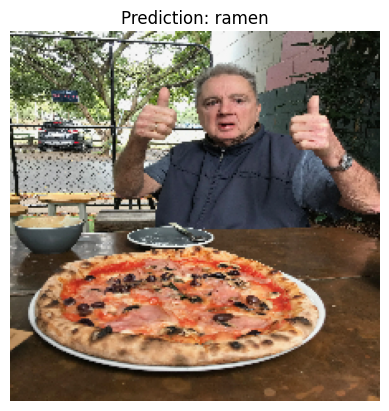

In [ ]:
tf_pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names=class_names)

In [ ]:
model_11.save("model_11_save")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_11 = tf.keras.models.load_model("model_11_save")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 37s 454ms/step - loss: 1.8783 - accuracy: 0.3420


[1.8782659769058228, 0.34200000762939453]